In [ ]:
from cytoreactors.control.MPC import DutyCycleController
import cytoreactors.modeling.DIFF_model_all_growers_with_reservoir as model
from cytoreactors.modeling.simulation import simulate, simulate_analytic, light_profile_to_traj
from time import time
import matplotlib.pyplot as plt

In [ ]:
pars = model.default_model_pars.copy()

In [ ]:
controller = DutyCycleController(target=0.5, 
                                 model=model, 
                                 model_pars=pars,
                                 initial_state=[0], 
                                 dc_period_hrs=0.5, 
                                 n_cycles_horizon=10)

In [ ]:
all_lps = []
t0 = time()
for i in range(10):
    dcs = controller.optimize()
    print(time()-t0)
    t0= time()
    lp = controller.dcs_to_light_profile(dcs[:2])
    all_lps += lp
    t,y,_,_ = simulate_analytic(controller.model, controller.model_pars, lp, controller.current_state, n_evals=21)
    controller.current_state = y.transpose()[-1]

In [ ]:
t,y,_,_ = simulate_analytic(controller.model, controller.model_pars, all_lps, [0], n_evals=21)
tl,l = light_profile_to_traj(all_lps)

In [ ]:
plt.plot(t,y[-1],'r')
plt.plot([0,10],[controller.target,controller.target],'k')
plt.plot(tl,l/100,'b')
plt.ylim([0,controller.target*2])
plt.grid()

In [5]:
from cytoreactors.control.MPC import DutyCycleController
import cytoreactors.modeling.DIFF_model_growers_producers_V3_control_alive as model
from cytoreactors.modeling.simulation import light_profile_to_traj
from time import time
import matplotlib.pyplot as plt

In [6]:
pars = model.default_model_pars.copy()

In [9]:
controller = DutyCycleController(target=0.9, 
                                 model=model, 
                                 model_pars=pars,
                                 initial_state=[1,0,0,0], 
                                 dc_period_hrs=0.5, 
                                 n_cycles_horizon=10)

all_lps = []
t0 = time()
for i in range(1):
    dcs = controller.optimize()
    print(time()-t0)
    t0= time()
    lp = controller.dcs_to_light_profile(dcs)
    all_lps += lp
    t,y,_,_ = model.simulate(controller.model, controller.model_pars, lp, controller.current_state, n_evals=21)
    controller.current_state = y.transpose()[-1]

1.219942331314087


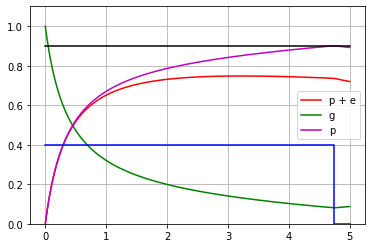

In [11]:
t,y,_,_ = model.simulate(controller.model, controller.model_pars, all_lps, [1,0,0,0], n_evals=151)
tl,l = light_profile_to_traj(all_lps)
plt.plot(t,y[1]+y[2],'r', label='p + e')
plt.plot(t,y[0],'g', label='g')
plt.plot(t,y[1]/(1-y[3]),'m', label='p')
plt.plot([0,t[-1]],[controller.target,controller.target],'k')
plt.plot(tl,l/100,'b')
plt.ylim([0,controller.target*2])
plt.grid()
plt.ylim([0,1.1])
plt.legend()